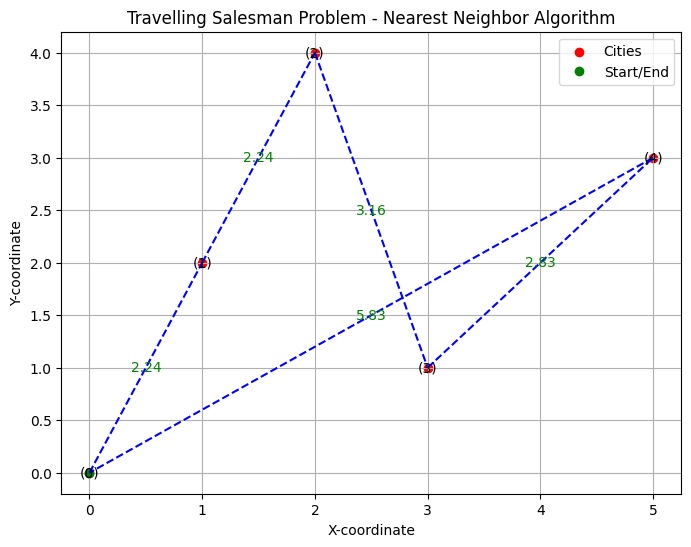

In [1]:
import math
import matplotlib.pyplot as plt

# Function to calculate Euclidean distance between two points
def distance(point1, point2):
    return math.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)

# Nearest neighbor algorithm for solving TSP
def nearest_neighbour(cities):
    num_cities = len(cities)
    visited = [False] * num_cities
    path = [0]  # Start from city 0
    visited[0] = True
    total_distance = 0
    distances = []

    for _ in range(num_cities - 1):
        current_city = path[-1]
        min_dist = float("inf")
        nearest_city = None

        for i in range(num_cities):
            if not visited[i] and i != current_city:
                dist = distance(cities[current_city], cities[i])
                if dist < min_dist:
                    min_dist = dist
                    nearest_city = i

        distances.append(min_dist)
        total_distance += min_dist
        path.append(nearest_city)
        visited[nearest_city] = True

    # Returning to the starting city
    path.append(0)
    return_to_start_dist = distance(cities[path[-2]], cities[0])
    total_distance += return_to_start_dist
    distances.append(return_to_start_dist)

    return path, total_distance, distances

# Example cities represented by their coordinates (x, y)
cities = [(0, 0), (1, 2), (2, 4), (3, 1), (5, 3)]

# Solving TSP using nearest neighbor algorithm
optimal_path, total_distance, distances = nearest_neighbour(cities)

# Extract x and y coordinates for plotting
x_coords = [city[0] for city in cities]
y_coords = [city[1] for city in cities]

# Plotting the cities
plt.figure(figsize=(8, 6))
plt.scatter(x_coords, y_coords, c='red', label='Cities')
plt.plot(x_coords[0], y_coords[0], 'go', label='Start/End')

# Plotting the optimal path
for i in range(len(optimal_path) - 1):
    city1 = cities[optimal_path[i]]
    city2 = cities[optimal_path[i + 1]]
    plt.plot([city1[0], city2[0]], [city1[1], city2[1]], 'b--')

# Annotating the cities
for i, (x, y) in enumerate(cities):
    plt.text(x, y, f'({i})', ha='center', va='center')

# Annotating the distances
for i, dist in enumerate(distances):
    city1 = cities[optimal_path[i]]
    city2 = cities[optimal_path[i + 1]]
    mid_x = (city1[0] + city2[0]) / 2
    mid_y = (city1[1] + city2[1]) / 2
    plt.text(mid_x, mid_y, f'{dist:.2f}', color='green', ha='center', va='center')

plt.title("Travelling Salesman Problem - Nearest Neighbor Algorithm")
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.legend()
plt.grid(visible=True)
plt.show()
